# `npri` v0.0.1 Tutorial

In [3]:
# Install and import
!pip install npri &>/dev/null;
from npri import npri 

/Users/enost/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Get "places" (Census dissemination areas aka Census blocks/block groups)
# Get them based on a specific lat/lng coordinate - get all places within a distance of here
test = npri.Places(near=[43.25, -80])
# Currently, the only Census variable we have loaded into the db is for
# "Total Visible Minority" population. C10_RATE_TOTAL provides the percentage.
test.show_data_map(attribute="C10_RATE_TOTAL")

select * from npri_screen_table where ST_INTERSECTS(geom,ST_Buffer(ST_Transform(ST_SetSRID(ST_MakePoint(-80, 43.25), 4326), 3347), 10000)); dauid
http://34.130.52.201/index.php?query=select+%2A+from+npri_screen_table+where+ST_INTERSECTS%28geom%2CST_Buffer%28ST_Transform%28ST_SetSRID%28ST_MakePoint%28-80%2C+43.25%29%2C+4326%29%2C+3347%29%2C+10000%29%29%3B


select * from npri_screen_table where "dauid" in (10010165,10010166) dauid
http://34.130.52.201/index.php?query=select+%2A+from+npri_screen_table+where+%22dauid%22+in+%2810010165%2C10010166%29


<AxesSubplot:xlabel='dauid', ylabel='C10_RATE_TOTAL'>

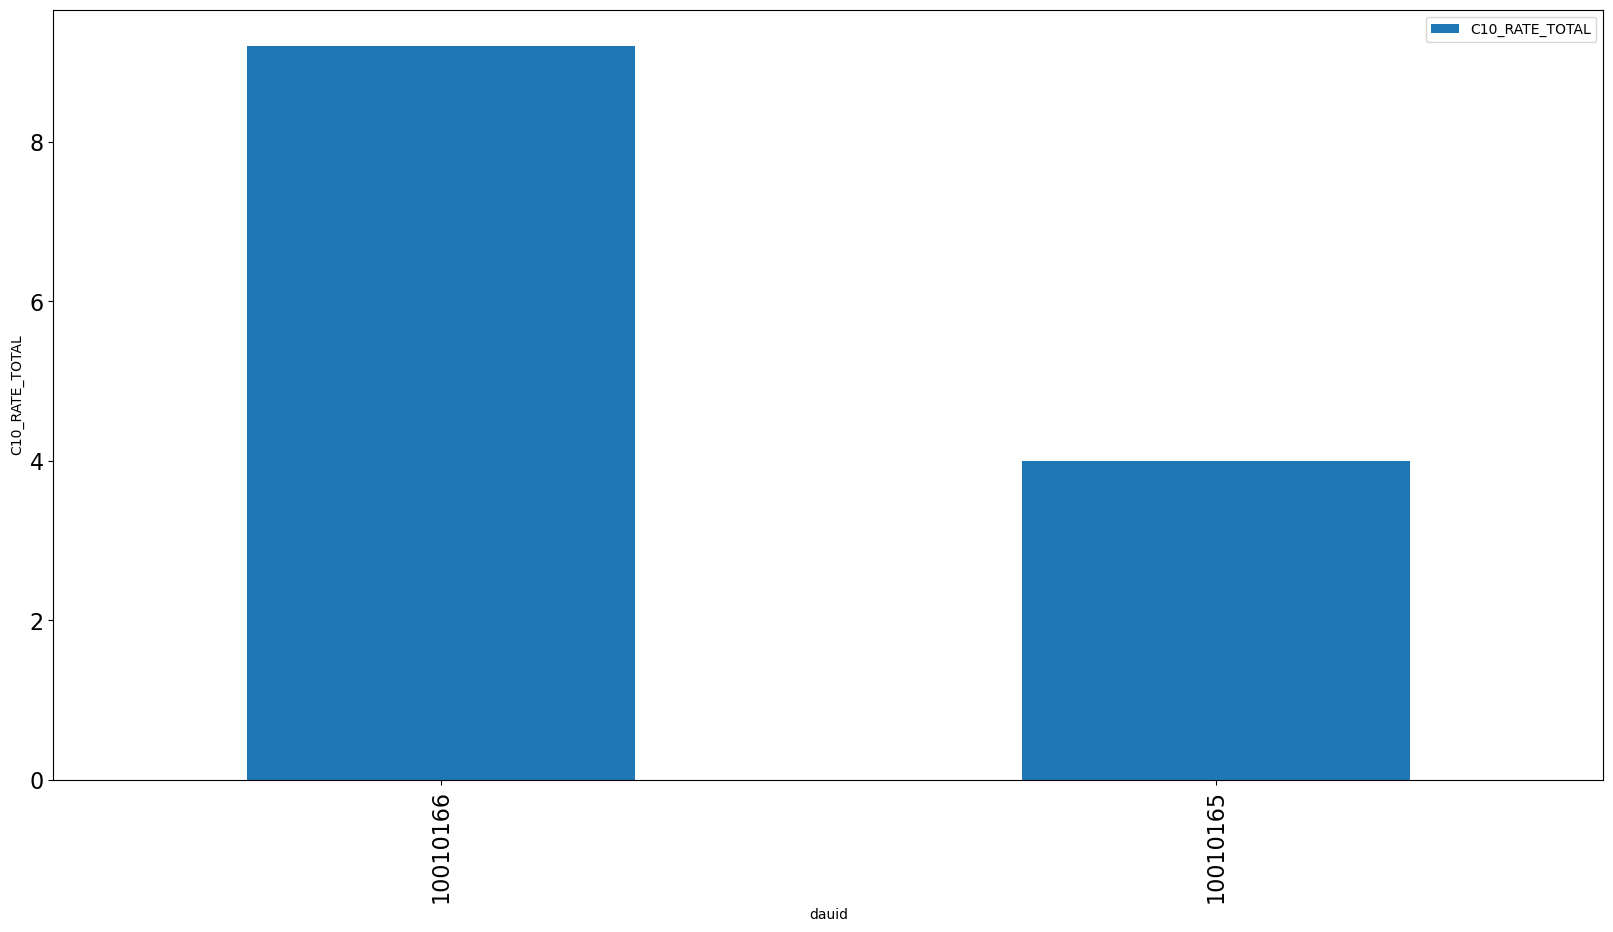

In [6]:
# Get Census places (dissemination areas) by their ids.
test = npri.Places(ids=["10010165", "10010166"]) 
test.show_bar_chart(attribute="C10_RATE_TOTAL")

In [7]:
# Get facilities based on their NPRI ids
test = npri.Facilities(ids = [1,15, 455])
# Map based on the number of PAHs they have reported (what time frame?)
test.show_data_map(attribute="NumberOfPAHs")

select * from npri_exporter_table where "NpriID" in (1,15,455) NpriID
http://34.130.52.201/index.php?query=select+%2A+from+npri_exporter_table+where+%22NpriID%22+in+%281%2C15%2C455%29


In [8]:
# Get facilities based on being near a lat/lng coordinate
facs = npri.Facilities(near = [43.5,-80.25])
# Show the number of VOCs they have reported here (caution: NPRI has some issues in counting VOCs)
facs.show_data_map(attribute="NumberOfVOCs")

select * from npri_exporter_table where ST_INTERSECTS(geom,ST_Buffer(ST_Transform(ST_SetSRID(ST_MakePoint(-80.25, 43.5), 4326), 3347), 10000)); NpriID
http://34.130.52.201/index.php?query=select+%2A+from+npri_exporter_table+where+ST_INTERSECTS%28geom%2CST_Buffer%28ST_Transform%28ST_SetSRID%28ST_MakePoint%28-80.25%2C+43.5%29%2C+4326%29%2C+3347%29%2C+10000%29%29%3B


In [9]:
# Get places (dissemination areas) across a province
test = npri.Places(across="NT")
test.show_data_map(attribute = "NumberOfReports")

select * from npri_screen_table where "ProvinceID" = 61 dauid
http://34.130.52.201/index.php?query=select+%2A+from+npri_screen_table+where+%22ProvinceID%22+%3D+61


In [10]:
# Show facilities across a province/territory
nt_facs = npri.Facilities(across="NT")
nt_facs.show_map()

select * from npri_exporter_table where "ProvinceID" = 6 NpriID
http://34.130.52.201/index.php?query=select+%2A+from+npri_exporter_table+where+%22ProvinceID%22+%3D+6


In [11]:
# Show facilities and places together
test.show_data_map(attribute = "NumberOfReports", other_data = nt_facs.data)

In [12]:
# Calculate the amount of missing data (nulls or '' in a column)
test = npri.Facilities(ids=[1,15,455])
test.missingness(attribute="Addresses")
test.data

select * from npri_exporter_table where "NpriID" in (1,15,455) NpriID
http://34.130.52.201/index.php?query=select+%2A+from+npri_exporter_table+where+%22NpriID%22+in+%281%2C15%2C455%29


ActiveYears  \
NpriID                                                      
1       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000...   
15      1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000...   
455     1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000...   

        NumberOfActiveYears  ReportYear  NumberOfReports  NumberOfSubstances  \
NpriID                                                                         
1                        30        2022                1                  39   
15                       30        2022                1                  22   
455                      30        2022                1                   7   

        NumberOfMedia  NumberOfMeasureMethods  NumberOfVOCs  NumberOfPAHs  \
NpriID                                                                      
1                   5                       5            13             7   
15                  5                       2            12             1   
455                 2                       3             0             0   

                                               Substances  ... DUNSNumber  \
NpriID                                                     ...              
1       Acenaphthylene, Acetaldehyde, Ammonia (total),...  ...        NaN   
15      1,2,4-Trimethylbenzene, 2-Butoxyethanol, Carbo...  ...        NaN   
455     Copper (and its compounds), Dioxins and furans...  ...        NaN   

        MailingAddressID       Website  MostRecentYear                 Owners  \
NpriID                                                                          
1                 698030  www.alpac.ca             NaN  Hokuetsu Corporation    
15                697656           NaN             NaN    Stelco Incorporated   
455               671979  www.ingot.ca             NaN                    NaN   

        Addresses  NAICSPrimary  \
NpriID                            
1             NaN        322112   
15            NaN        332810   
455           NaN        331410   

                                             NAICSTitleEn     dauid  \
NpriID                                                                
1                                     Chemical pulp mills  48130187   
15      Coating, engraving, cold and heat treating and...  35250318   
455     Non-ferrous metal (except aluminum) smelting a...  35201890   

                               geometry  
NpriID                                   
1       POINT (4902946.056 2297424.066)  
15       POINT (7204007.428 876801.162)  
455      POINT (7209029.567 937836.217)  

[3 rows x 51 columns]

select * from npri_exporter_table where "ForwardSortationArea" in ('N1H','N1E') NpriID
http://34.130.52.201/index.php?query=select+%2A+from+npri_exporter_table+where+%22ForwardSortationArea%22+in+%28%27N1H%27%2C%27N1E%27%29


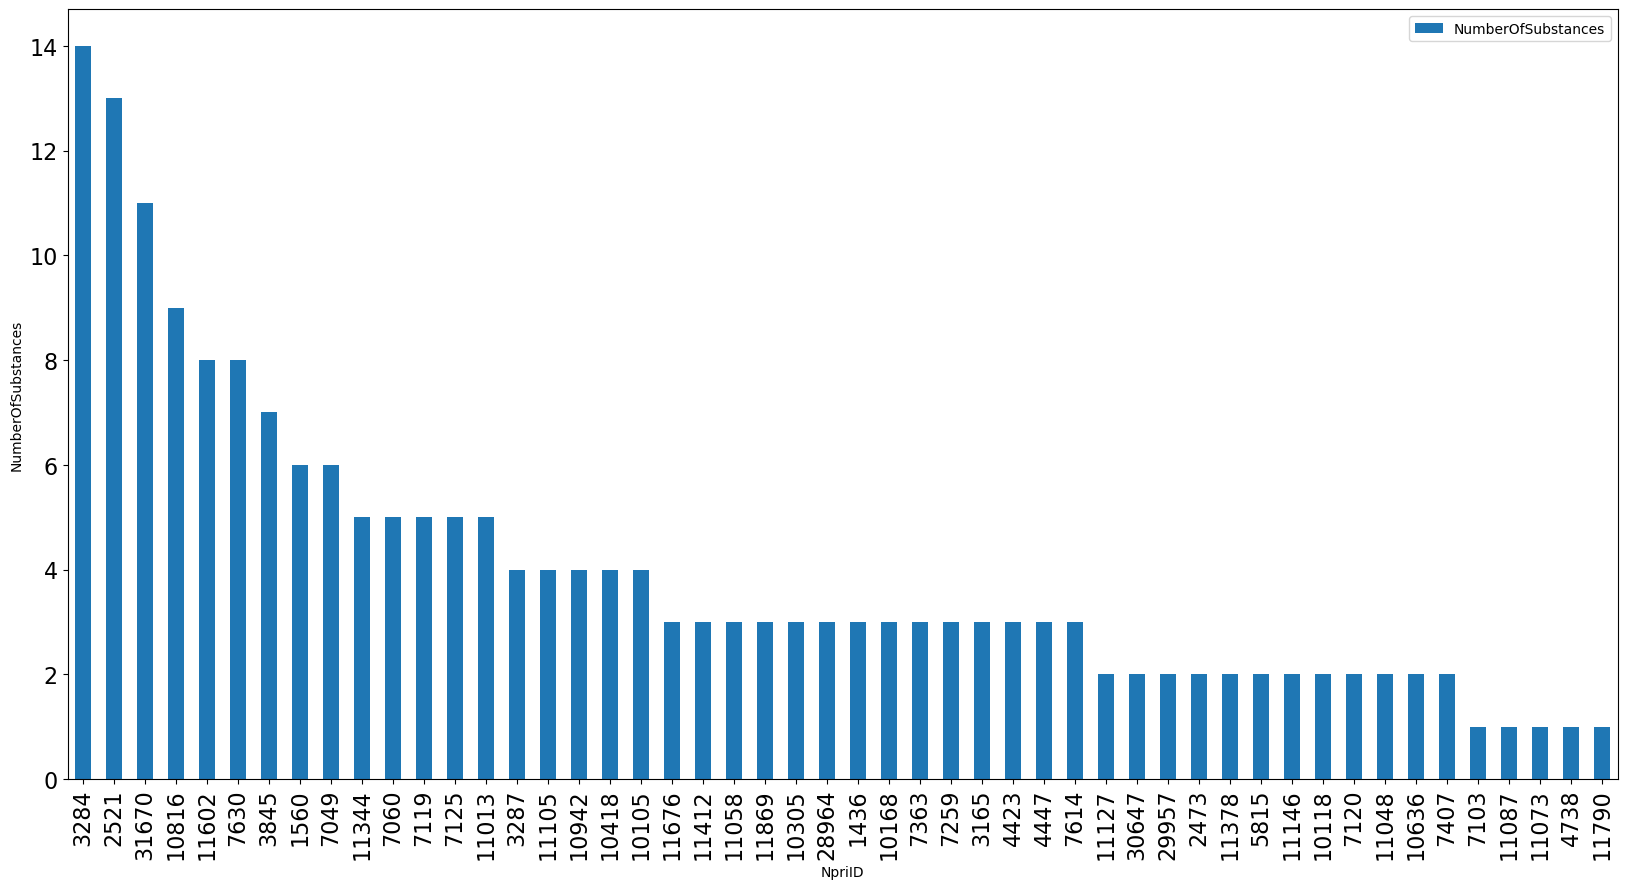

In [13]:
# Get facilities based on a list of Forward Sortation Areas
test = npri.Facilities(place=["N1H", "N1E"])
test.show_bar_chart(attribute = "NumberOfSubstances")
test.show_data_map(attribute = "NumberOfSubstances")

In [14]:
# Interact with a dataset
test = npri.Facilities(ids=[1,15,455])
test.data
test.filters(attribute = "NumberOfSubstances", operator = ">=", value = 10) # Get facilities reporting >= 10 substances
test.working_data # The working data is now the filter
test.show_map()
test.filters(reset=True) # The working data is now reset
test.working_data
test.show_map()

select * from npri_exporter_table where "NpriID" in (1,15,455) NpriID
http://34.130.52.201/index.php?query=select+%2A+from+npri_exporter_table+where+%22NpriID%22+in+%281%2C15%2C455%29


In [21]:
# Map a Census attribute in a place
# Leaving Places() blank defaults to just a few DAs
test = npri.Places()
test.show_data_map(attribute="C10_RATE_TOTAL", title = "Percent Visible Minority")

select * from npri_screen_table limit 5 dauid
http://34.130.52.201/index.php?query=select+%2A+from+npri_screen_table+limit+5


select * from history_company_table where "ReportYear" >=2015 and "ReportYear" <=2018 CompanyID
http://34.130.52.201/index.php?query=select+%2A+from+history_company_table+where+%22ReportYear%22+%3E%3D2015+and+%22ReportYear%22+%3C%3D2018


<AxesSubplot:xlabel='CompanyID', ylabel='Quantity'>

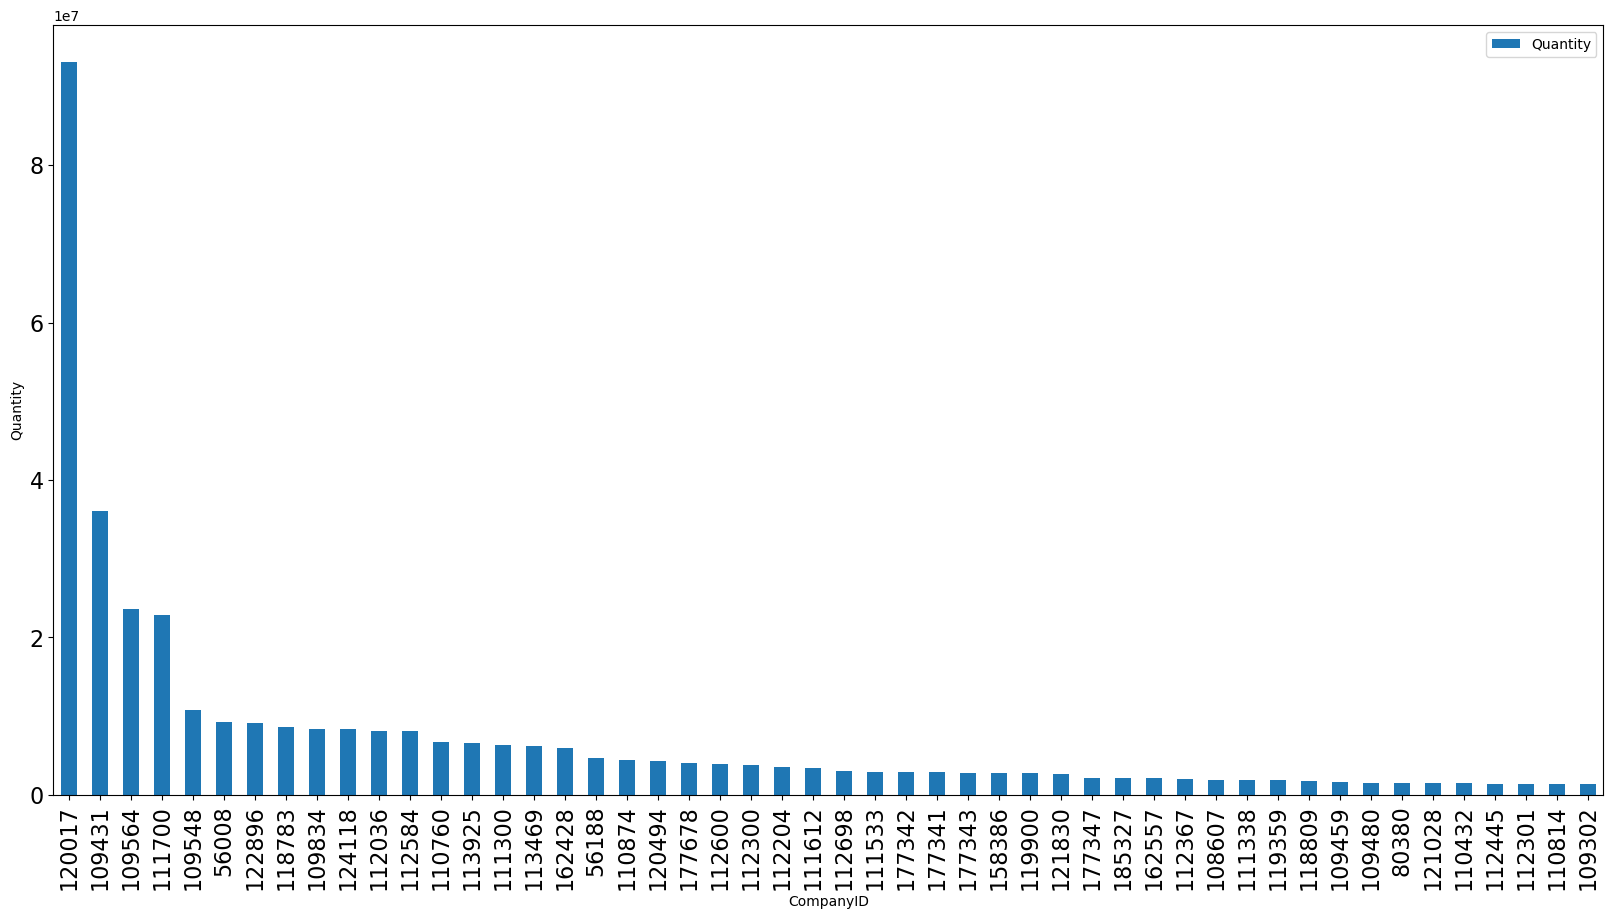

In [16]:
# Show which companies reported the most pollutants (by quantity) for 2015-2018, inclusive
test = npri.Times("company", years = [2015, 2018])
test.aggregate()
test.working_data
test.show_bar_chart(attribute="Quantity")

'%%merucry%%','%%lead%%'
select * from npri_tri_table where lower("Substance") like any (array['%%merucry%%','%%lead%%']) SubstanceID
http://34.130.52.201/index.php?query=select+%2A+from+npri_tri_table+where+lower%28%22Substance%22%29+like+any+%28array%5B%27%25%25merucry%25%25%27%2C%27%25%25lead%25%25%27%5D%29


<AxesSubplot:xlabel='SubstanceID', ylabel='NumberOfReports'>

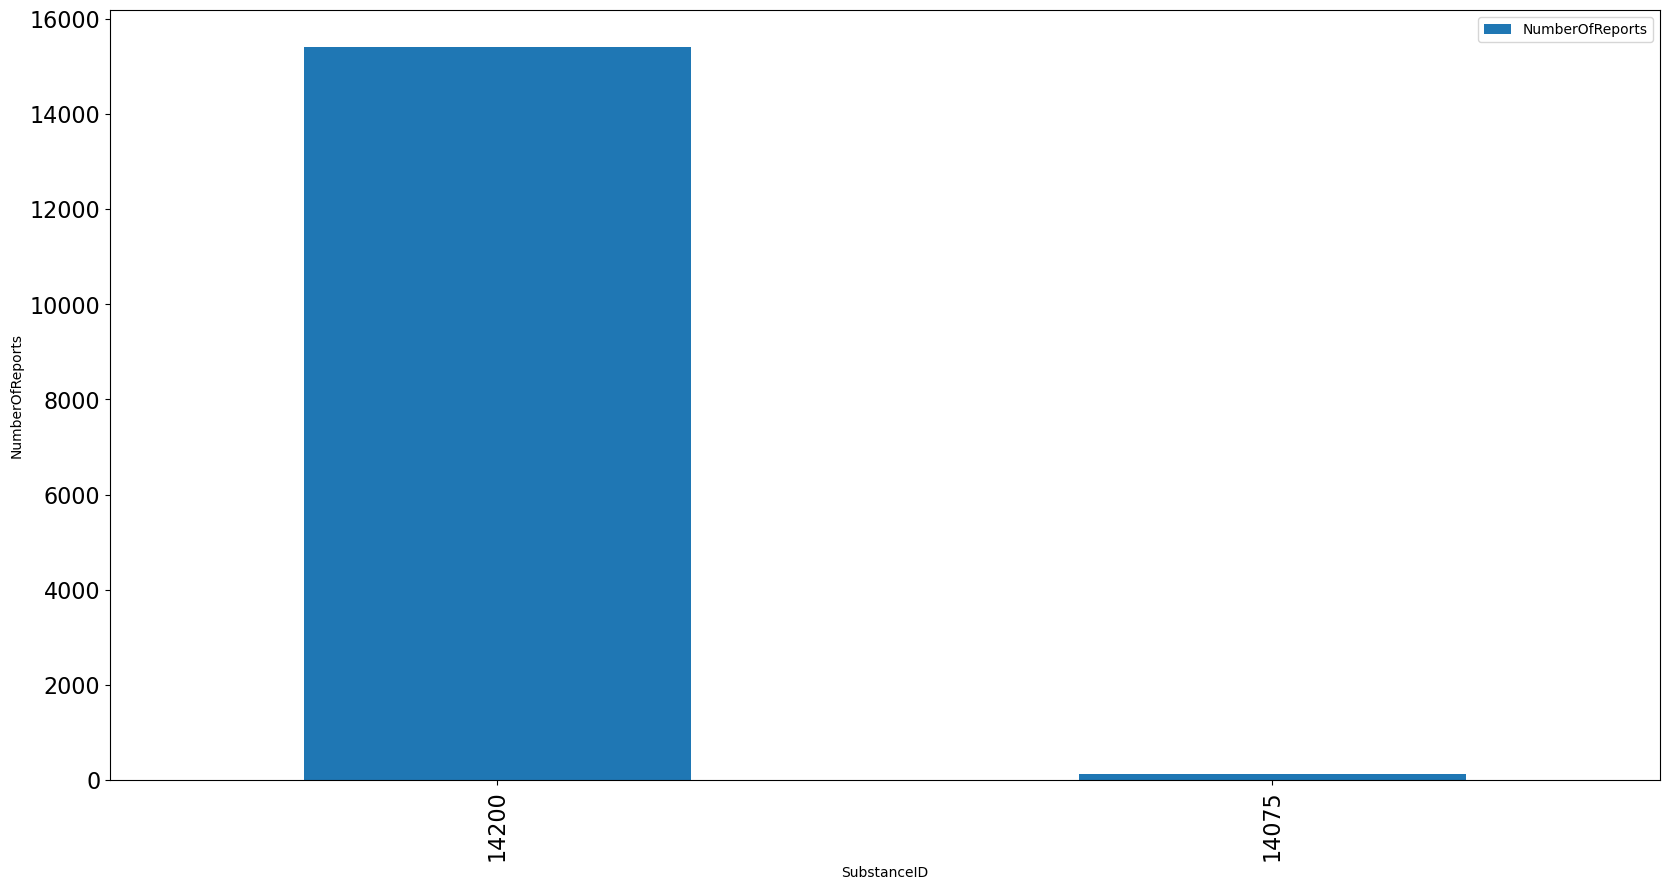

In [17]:
# Number of reports containing mercury or lead
test = npri.Substances(value = ["merucry", "lead"])
test.show_bar_chart(attribute="NumberOfReports")

select * from history_substance_table where "ReportYear" >=2015 and "ReportYear" <=2018 Substance
http://34.130.52.201/index.php?query=select+%2A+from+history_substance_table+where+%22ReportYear%22+%3E%3D2015+and+%22ReportYear%22+%3C%3D2018


<AxesSubplot:xlabel='Substance', ylabel='NumberOfReports'>

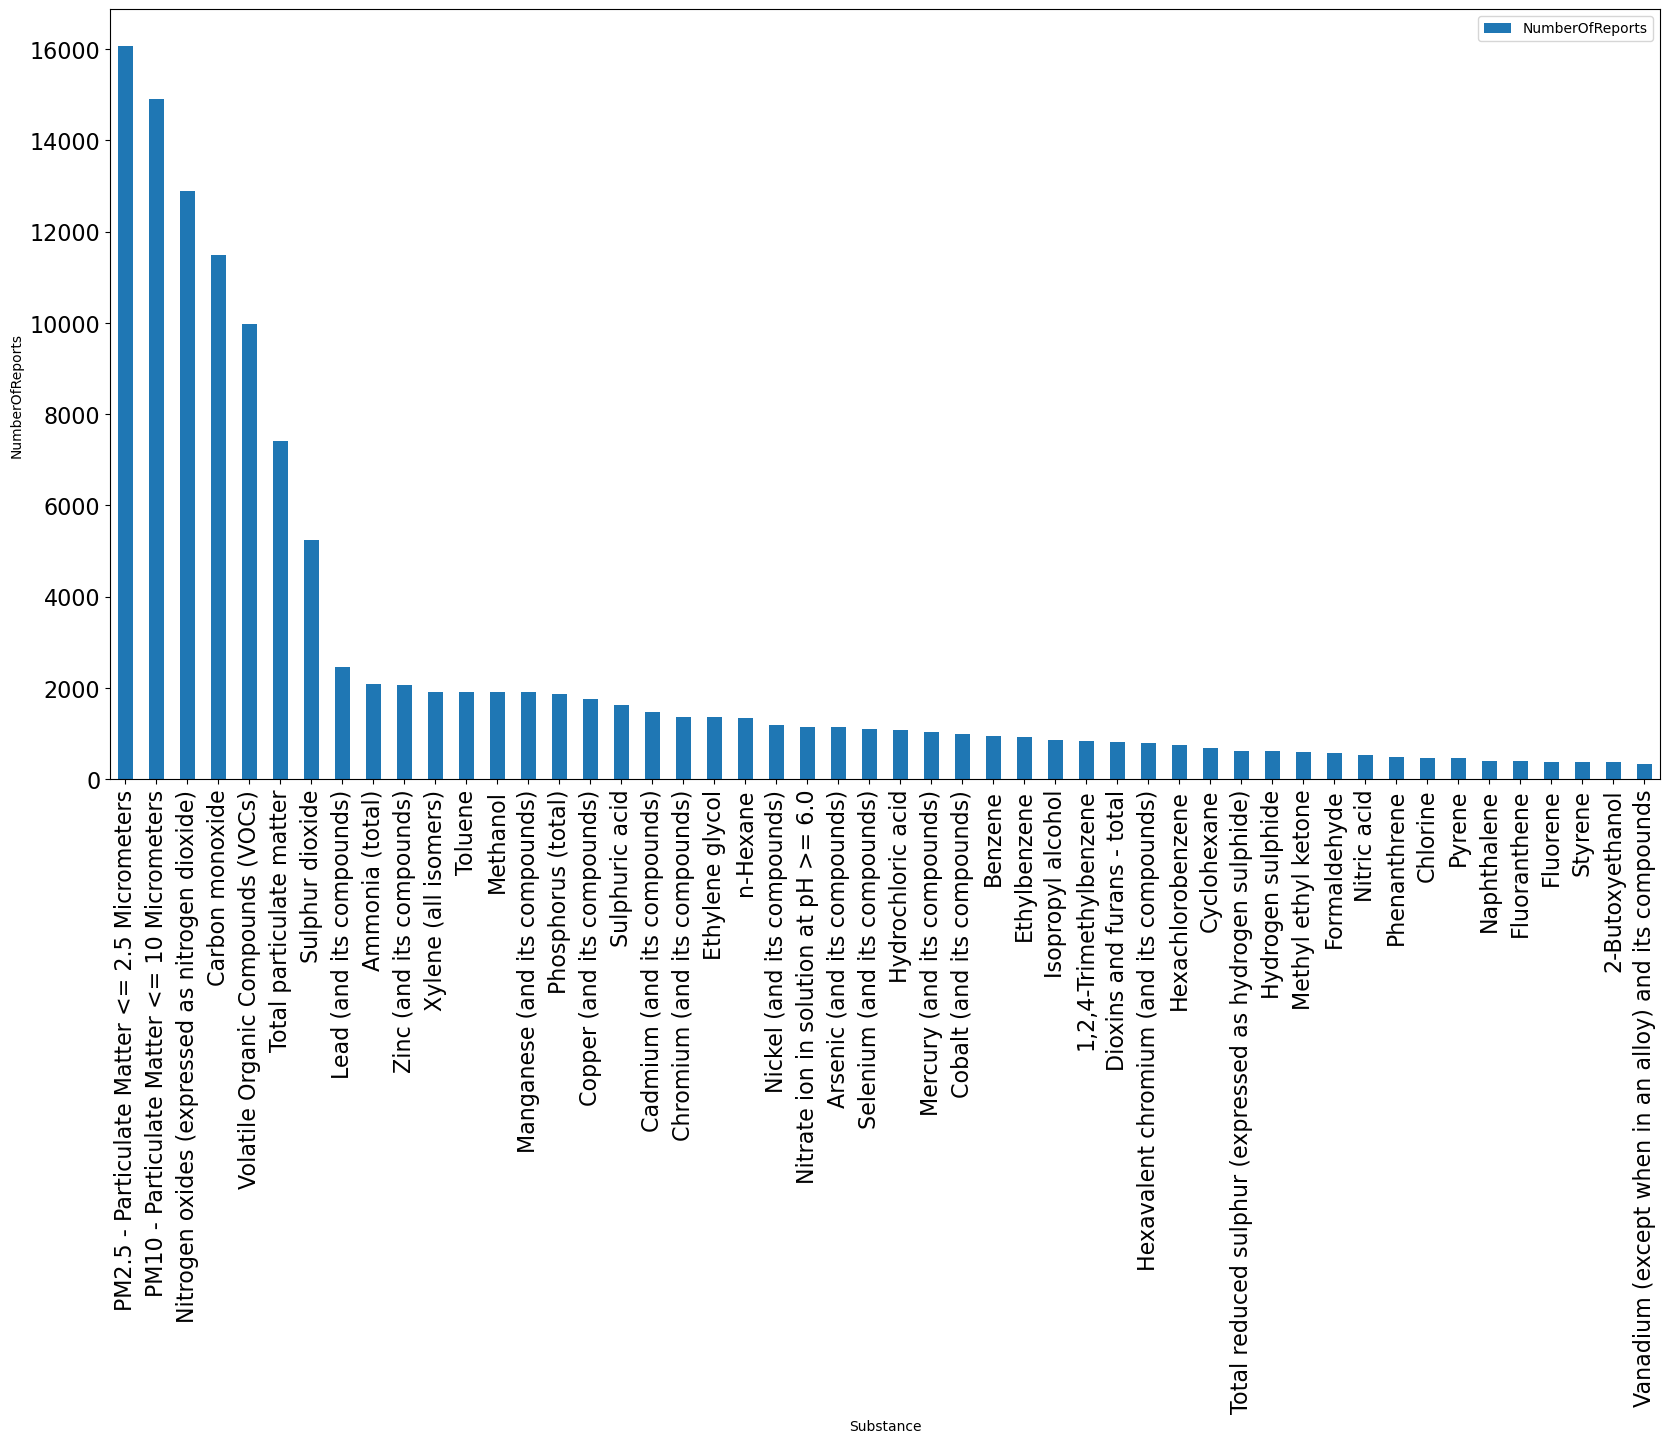

In [18]:
# Which pollutants were most reported between 2015-2018 inclusive?
test = npri.Times("substance", years = [2015,2018])
test.aggregate(attribute = "NumberOfReports")
test.show_bar_chart(attribute="NumberOfReports")

select * from npri_industry_table where lower("NAICSTitleEn") like '%%oil%%' NAICSPrimary
http://34.130.52.201/index.php?query=select+%2A+from+npri_industry_table+where+lower%28%22NAICSTitleEn%22%29+like+%27%25%25oil%25%25%27


<AxesSubplot:xlabel='NAICSPrimary', ylabel='releases_to_air_2022'>

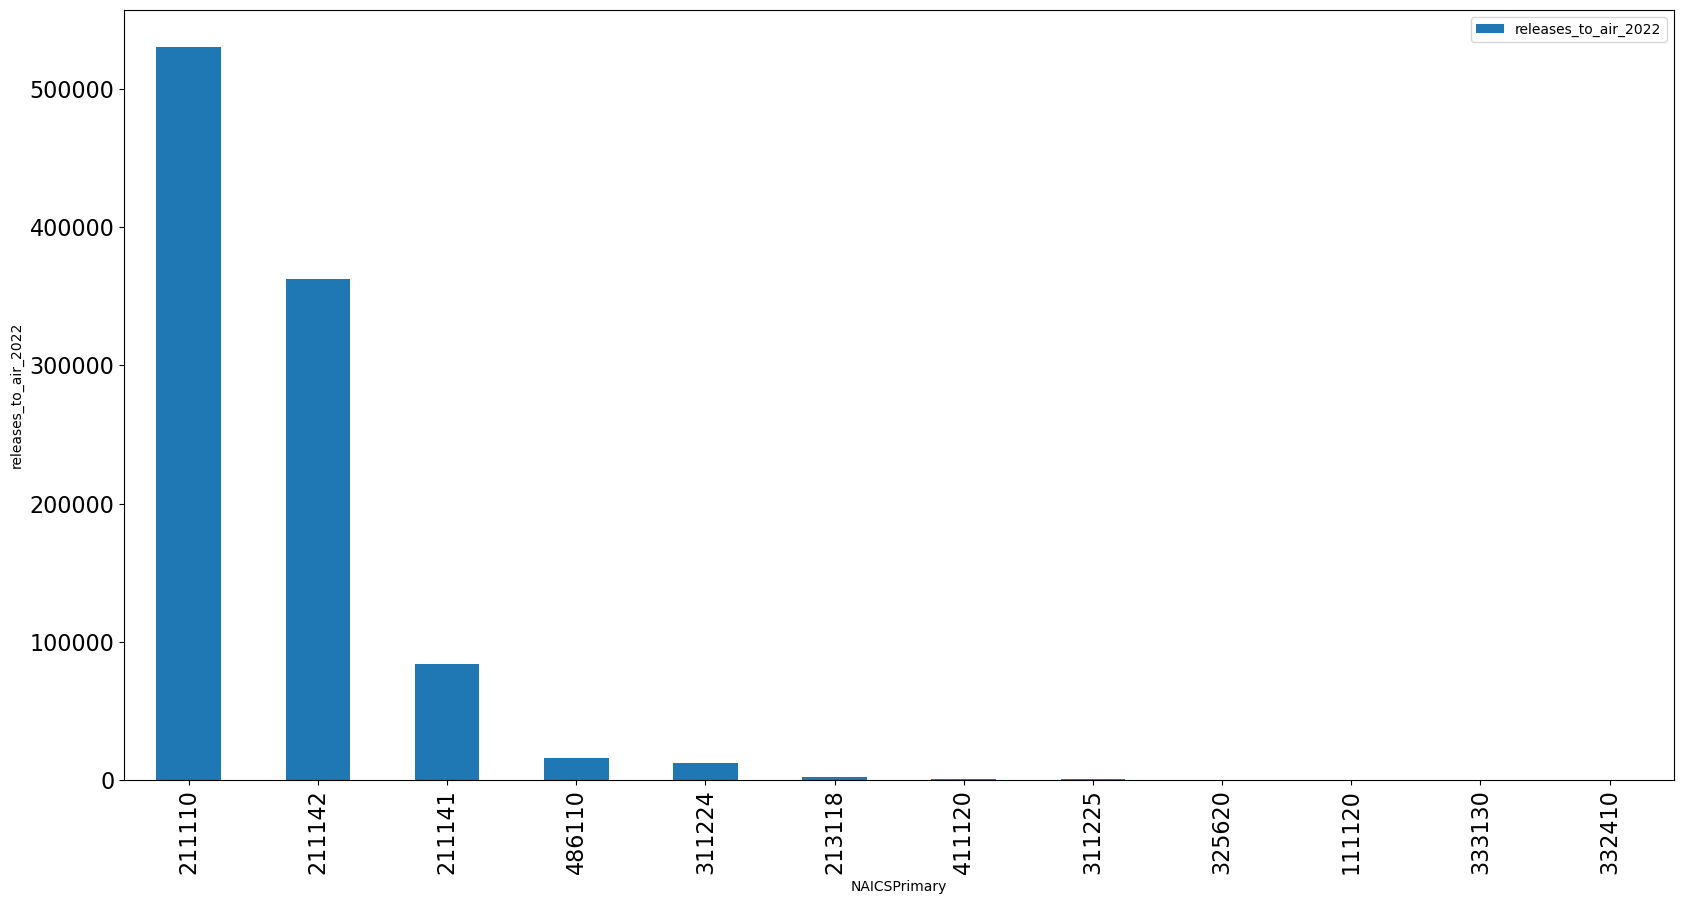

In [19]:
# Which sectors in the "oil" industry reported releasing to the air in 2022?
test = npri.Industries(value="oil")
test.data
test.show_bar_chart(attribute="releases_to_air_2022")

'%%shell%%','%%exxon%%'
select * from npri_companies_table where lower("CompanyName") like any (array['%%shell%%','%%exxon%%']) CompanyId
http://34.130.52.201/index.php?query=select+%2A+from+npri_companies_table+where+lower%28%22CompanyName%22%29+like+any+%28array%5B%27%25%25shell%25%25%27%2C%27%25%25exxon%25%25%27%5D%29


<AxesSubplot:xlabel='CompanyId', ylabel='total_pm25_2022'>

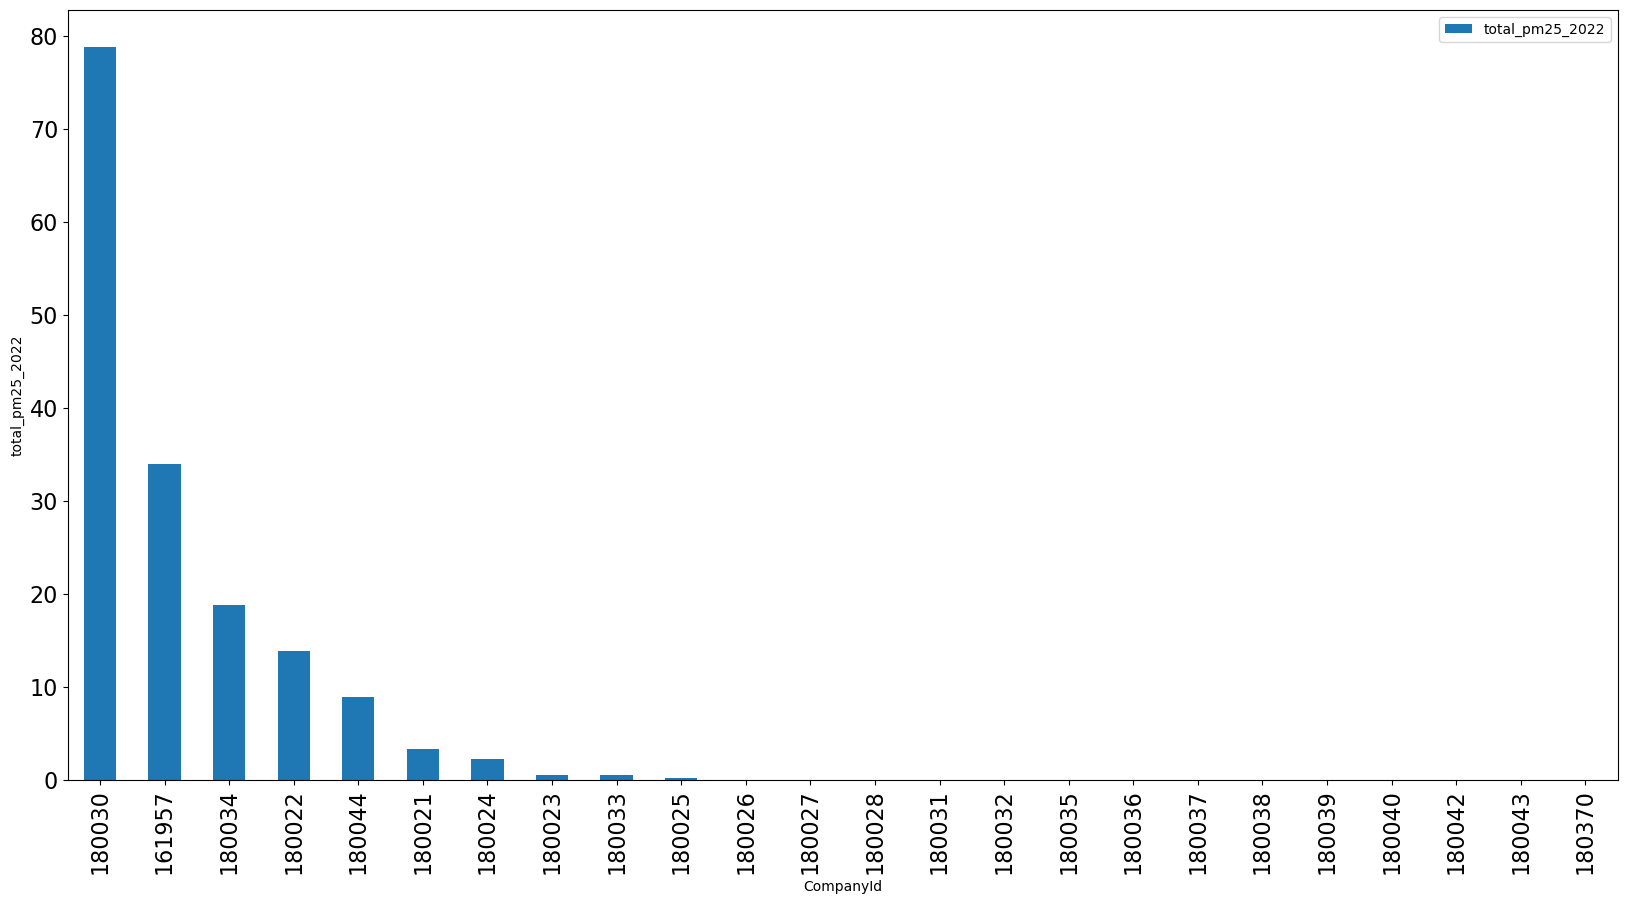

In [20]:
# What did Shell or Exxon affiliated companies report for PM 2.5 emissions in 2022?
test = npri.Companies(value=["Shell", "Exxon"])
test.data
test.show_bar_chart(attribute="total_pm25_2022")